In [1]:
import matplotlib
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def extractBandwidth(fpath):
    with open(fpath,'r') as f:
        for line in f.readlines():
            tmpstring = line.lstrip()
            if tmpstring == '':
                continue
            elif tmpstring[0].isdigit():
                print(line)
                tmpstrings = tmpstring.split()
                msg_size = tmpstrings[0]
                max_bw = tmpstrings[2]
                avg_bw = tmpstrings[3]
                return (max_bw, avg_bw)
    print("No conforming data found in {}".format(f))
    return None

def parseMetaFromName(fpath):
    fname = fpath.split('/')[-1]
    tmp = fname.split('.')
    print(tmp)
    if "read" in tmp[0]:
        test_type = "read"
    elif "write" in tmp[0]:
        test_type = "write"
    else:
        print("No test type detected: {}".format(fname))
        return None
    rate_limit = int(tmp[1][2:])
    msg_sz = int(tmp[2])
    q_depth = int(tmp[3])
    distance = tmp[4]
    return (test_type, distance, msg_sz, q_depth, rate_limit)

def extractData(fpath):
    metadata = parseMetaFromName(fpath)
    if metadata == None:
        return None
    bw = extractBandwidth(fpath)
    if bw == None:
        return None
    return(metadata + bw)

In [3]:
mypath = "/Users/tgroves/projects/gpu-comm/results/summit/host/02-18-20.09.35.48/ibtests-rl/host"

filelist = [f for f in listdir(mypath) if isfile(join(mypath, f))]

data = []
for f in filelist:
    data += [extractData(join(mypath, f))]
    

df_ib_host = pd.DataFrame(data, columns=["RorW", "Distance", "MsgSize", "BurstSize", "RateLimit", "MaxBW", "AvgBW"])

df_ib_host["HorD"] = "host"

df_ib_host["IBorNV"] = "ib"

['ib_write_bw', 'rl6250', '256', '1', 'loopback']
 256        10000            1024.63            1015.08		   4.157769

['ib_read_bw', 'rl6250', '512', '10', 'xsocket']
 512        10000            2747.37            2712.32		   5.554831

['ib_read_bw', 'rl3125', '4096', '10', 'xsocket']
 4096       10000            5698.22            2970.81		   0.760528

['ib_write_bw', 'rl3125', '512', '1000', 'xnode']
 512        10000            2941.31            2904.57		   5.948558

['ib_write_bw', 'rl3125', '1024', '100', 'loopback']
 1024       10000            5319.39            2988.35		   3.060075

['ib_write_bw', 'rl12500', '16384', '1', 'xsocket']
 16384      10000            11461.88            11453.59		   0.733030

['ib_read_bw', 'rl3125', '16', '1000', 'xnode']
 16         10000            84.92              83.64  		   5.481367

['ib_read_bw', 'rl6250', '32', '1000', 'xsocket']
 32         10000            179.61             176.47 		   5.782692

['ib_read_bw', 'rl1562', '8', '10', 

In [4]:
readdata = df_ib_host[df_ib_host.RorW == "read"]
xsocket = readdata[readdata.Distance == "xsocket"]
loopback = readdata[readdata.Distance == "loopback"]
xnode = readdata[readdata.Distance == "xnode"]

In [5]:
rls=[1562,3125,6250,12500]
msgs=[2**i for i in range(3,16)]

/Users/tgroves/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


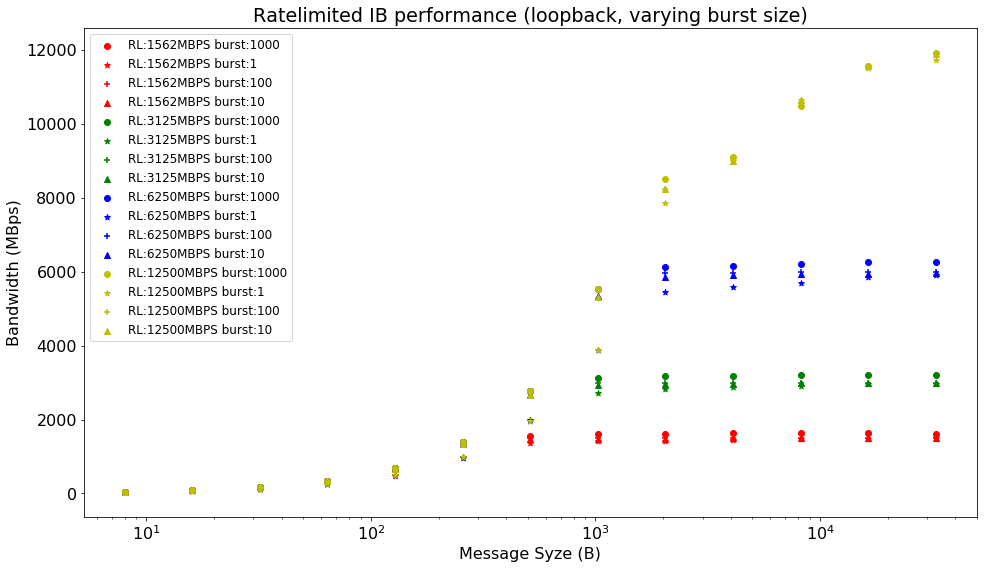

In [28]:
df = loopback
plotdata = {}

#Generate the data
for rl in rls:
    plotdata[rl] = {}
    for bs in df.BurstSize.unique():
        plotdata[rl][bs] = {}
        plotdata[rl][bs]["xs"] = []
        plotdata[rl][bs]["ys"] = []
        for m in msgs:

            vals = df[df.MsgSize == m][df.RateLimit == rl][df.BurstSize == bs].AvgBW.values
            for val in vals:
                plotdata[rl][bs]["ys"] += [float(val)]
                plotdata[rl][bs]["xs"] += [int(m)]
#Plot the data with a color for each ratelimit and shape for each burst size  
fig, ax = plt.subplots(figsize=(16,9))
rlcolors=['r','g','b','y']
rlidx = 0
burstshapes={1000:'o', 100:'+', 10:'^', 1:'*'}
for k in plotdata.keys():
    for bk in plotdata[k].keys():
        print(type(bk))
        ax.scatter(plotdata[k][bk]["xs"], plotdata[k][bk]["ys"], label="RL:"+ str(k)+ "MBPS"+" burst:{}".format(bk), marker=burstshapes[bk], color=rlcolors[rlidx])
    rlidx += 1
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_ylabel("Bandwidth (MBps)")
ax.set_xlabel("Message Syze (B)")
ax.set_title("Ratelimited IB performance (loopback, varying burst size)")
matplotlib.rcParams.update({'font.size': 16})
plt.show()
fig.savefig("ib-host-loopback-ratelimited-bandwidth.png")

/Users/tgroves/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


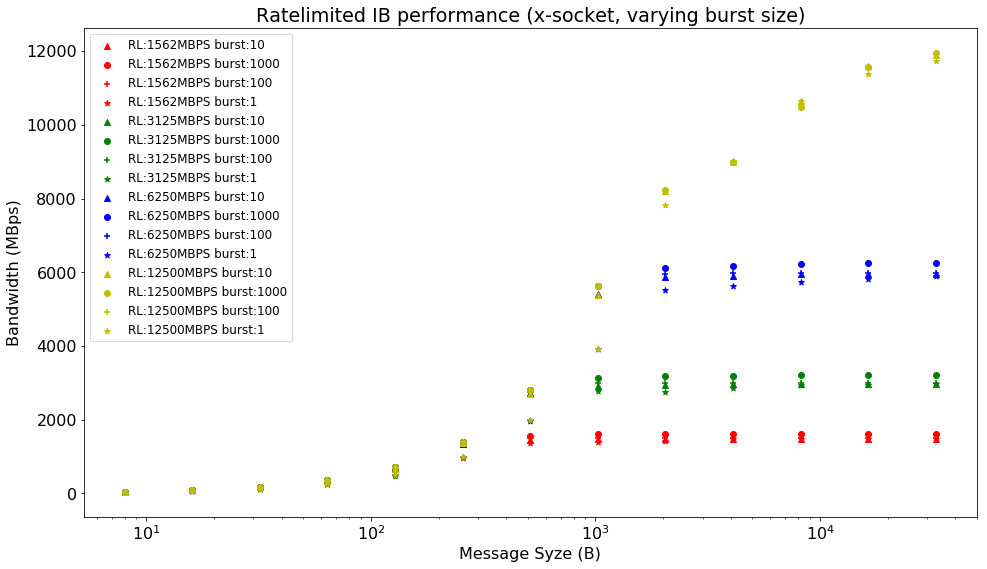

In [29]:
df = xsocket
plotdata = {}

#Generate the data
for rl in rls:
    plotdata[rl] = {}
    for bs in df.BurstSize.unique():
        plotdata[rl][bs] = {}
        plotdata[rl][bs]["xs"] = []
        plotdata[rl][bs]["ys"] = []
        for m in msgs:

            vals = df[df.MsgSize == m][df.RateLimit == rl][df.BurstSize == bs].AvgBW.values
            for val in vals:
                plotdata[rl][bs]["ys"] += [float(val)]
                plotdata[rl][bs]["xs"] += [int(m)]
#Plot the data with a color for each ratelimit and shape for each burst size  
fig, ax = plt.subplots(figsize=(16,9))
rlcolors=['r','g','b','y']
rlidx = 0
burstshapes={1000:'o', 100:'+', 10:'^', 1:'*'}
for k in plotdata.keys():
    for bk in plotdata[k].keys():
        print(type(bk))
        ax.scatter(plotdata[k][bk]["xs"], plotdata[k][bk]["ys"], label="RL:"+ str(k)+ "MBPS"+" burst:{}".format(bk), marker=burstshapes[bk], color=rlcolors[rlidx])
    rlidx += 1
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_ylabel("Bandwidth (MBps)")
ax.set_xlabel("Message Syze (B)")
ax.set_title("Ratelimited IB performance (x-socket, varying burst size)")
matplotlib.rcParams.update({'font.size': 16})
plt.show()
fig.savefig("ib-xsocket-loopback-ratelimited-bandwidth.png")

/Users/tgroves/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>


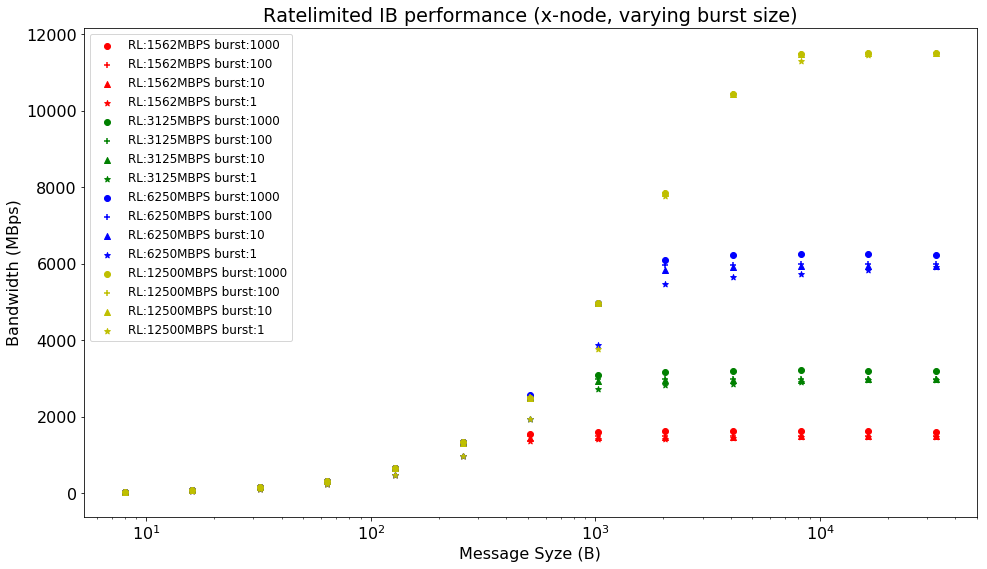

In [30]:
df = xnode
plotdata = {}

#Generate the data
for rl in rls:
    plotdata[rl] = {}
    for bs in df.BurstSize.unique():
        plotdata[rl][bs] = {}
        plotdata[rl][bs]["xs"] = []
        plotdata[rl][bs]["ys"] = []
        for m in msgs:

            vals = df[df.MsgSize == m][df.RateLimit == rl][df.BurstSize == bs].AvgBW.values
            for val in vals:
                plotdata[rl][bs]["ys"] += [float(val)]
                plotdata[rl][bs]["xs"] += [int(m)]
#Plot the data with a color for each ratelimit and shape for each burst size  
fig, ax = plt.subplots(figsize=(16,9))
rlcolors=['r','g','b','y']
rlidx = 0
burstshapes={1000:'o', 100:'+', 10:'^', 1:'*'}
for k in plotdata.keys():
    for bk in plotdata[k].keys():
        print(type(bk))
        ax.scatter(plotdata[k][bk]["xs"], plotdata[k][bk]["ys"], label="RL:"+ str(k)+ "MBPS"+" burst:{}".format(bk), marker=burstshapes[bk], color=rlcolors[rlidx])
    rlidx += 1
ax.set_xscale('log')
ax.legend(fontsize=12)
ax.set_ylabel("Bandwidth (MBps)")
ax.set_xlabel("Message Syze (B)")
ax.set_title("Ratelimited IB performance (x-node, varying burst size)")
matplotlib.rcParams.update({'font.size': 16})
plt.show()
fig.savefig("ib-host-xnode-ratelimited-bandwidth.png")